# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Reading The Dataset

In [2]:
data= pd.read_csv("Our Dataset v1.csv")

# Turning The Dataset Into Zeros and Ones

In [3]:
mod_data=data.replace(to_replace=["yes","no"],value=["1","0"])
mod_data

,feeling nervous,panic,breathing rapidly,sweating,trouble in concentration,having trouble in sleeping,having trouble with work,hopelessness,anger,overreact,...,weight gain,material possessions,introvert,popping up stressful memory,having nightmares,avoids people or activities,feeling negative,trouble concentrating,blaming yourself,Disorder
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
201,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
202,0,0,0,0,1,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
203,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,1


# Filling The Cells with Null Values

In [4]:
mod_data['Disorder'].fillna(mod_data.groupby('anger')['Disorder'].transform("median") , inplace= True)

# Switching Data Type 

In [5]:
mod_data.dtypes

feeling nervous                object
panic                          object
breathing rapidly              object
sweating                       object
trouble in concentration       object
having trouble in sleeping     object
having trouble with work       object
hopelessness                   object
anger                          object
overreact                      object
change in eating               object
suicidal thought               object
feeling tired                  object
close friend                   object
social media addiction         object
weight gain                    object
material possessions           object
introvert                      object
popping up stressful memory    object
having nightmares              object
avoids people or activities    object
feeling negative               object
trouble concentrating          object
blaming yourself               object
Disorder                       object
dtype: object

In [6]:
mod_data=mod_data.astype(int)
mod_data.dtypes

feeling nervous                int32
panic                          int32
breathing rapidly              int32
sweating                       int32
trouble in concentration       int32
having trouble in sleeping     int32
having trouble with work       int32
hopelessness                   int32
anger                          int32
overreact                      int32
change in eating               int32
suicidal thought               int32
feeling tired                  int32
close friend                   int32
social media addiction         int32
weight gain                    int32
material possessions           int32
introvert                      int32
popping up stressful memory    int32
having nightmares              int32
avoids people or activities    int32
feeling negative               int32
trouble concentrating          int32
blaming yourself               int32
Disorder                       int32
dtype: object

# separating the data and the labels

In [7]:
X = mod_data.drop(columns = "Disorder" , axis=1) #if axis=0 then you're dropping a row
Y =mod_data["Disorder"] 

In [8]:
print(X)

     feeling nervous  panic  breathing rapidly  sweating  \
0                  1      1                  1         1   
1                  0      0                  0         0   
2                  0      0                  0         0   
3                  0      0                  0         0   
4                  0      0                  0         0   
..               ...    ...                ...       ...   
200                1      0                  0         0   
201                0      1                  0         1   
202                0      0                  0         0   
203                0      0                  0         1   
204                0      1                  0         0   

     trouble in concentration  having trouble in sleeping  \
0                           1                           1   
1                           0                           0   
2                           0                           0   
3                           0      

In [9]:
print(Y)

0      1
1      0
2      0
3      1
4      0
      ..
200    1
201    1
202    1
203    1
204    1
Name: Disorder, Length: 205, dtype: int32


# Splitting The Data Into Training and Test Data

In [10]:
X_train , X_test , Y_train , Y_test =train_test_split(X , Y ,test_size = 0.2, random_state = 2)

In [11]:
print(X.shape , X_train.shape , X_test.shape)

(205, 24) (164, 24) (41, 24)


# Training The Model 

In [12]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.feature_names = X.columns

In [13]:
classifier.fit(X_train ,Y_train)

RandomForestClassifier()

# Accuracy Score

In [14]:
#on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
#on the testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score( X_test_prediction , Y_test)

In [168]:
print("Training Data Accuracy Score is : ", training_data_accuracy)
print("Testing Data Accuracy Score is : ", testing_data_accuracy)

Training Data Accuracy Score is :  0.975609756097561
Testing Data Accuracy Score is :  0.9024390243902439


# Building A Predictive System

In [218]:
input_data = pd.Series([1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
#chainging the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)



#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#The Result
prediction = classifier.predict(input_data_reshaped)
#print(prediction)
if(prediction == 1):
    print("You Should Consider Going To The Doctor")
elif(prediction == 0):
    print("We Believe That There is No serious Concern For You To See The Doctor")

You Should Consider Going To The Doctor


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


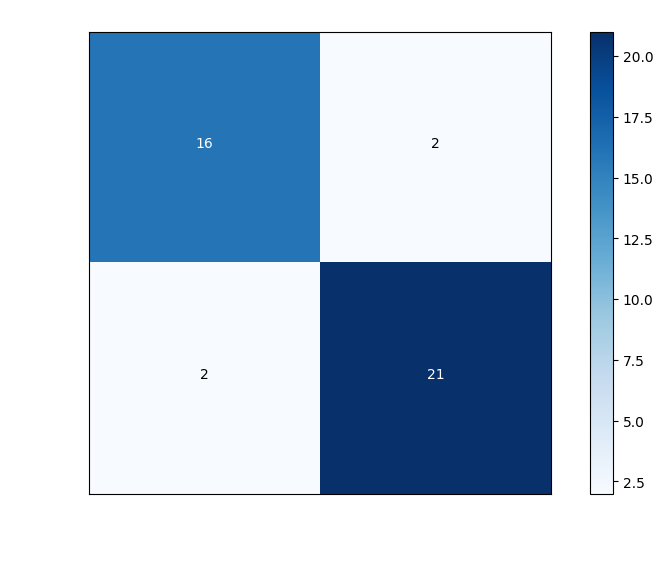

In [20]:
cm = confusion_matrix(Y_test, X_test_prediction)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color='white')
plt.colorbar()

classes = ['Class 0', 'Class 1']
num_classes = len(classes)
tick_marks = np.arange(num_classes)

plt.xticks(tick_marks, classes, rotation=45, color='white')
plt.yticks(tick_marks, classes, color='white')

thresh = cm.max() / 2.0

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gca().tick_params(colors='white')

plt.show()

Epoch 1: Accuracy = 0.8048780487804879, Loss = 7.032907978364323
Epoch 2: Accuracy = 0.8048780487804879, Loss = 7.032907978364323
Epoch 3: Accuracy = 0.8536585365853658, Loss = 5.274680983773242
Epoch 4: Accuracy = 0.8536585365853658, Loss = 5.274680983773242
Epoch 5: Accuracy = 0.8292682926829268, Loss = 6.153794481068782
Epoch 6: Accuracy = 0.9024390243902439, Loss = 3.5164539891821613
Epoch 7: Accuracy = 0.8536585365853658, Loss = 5.274680983773242
Epoch 8: Accuracy = 0.8780487804878049, Loss = 4.3955674864777015
Epoch 9: Accuracy = 0.9024390243902439, Loss = 3.5164539891821613
Epoch 10: Accuracy = 0.8536585365853658, Loss = 5.274680983773242


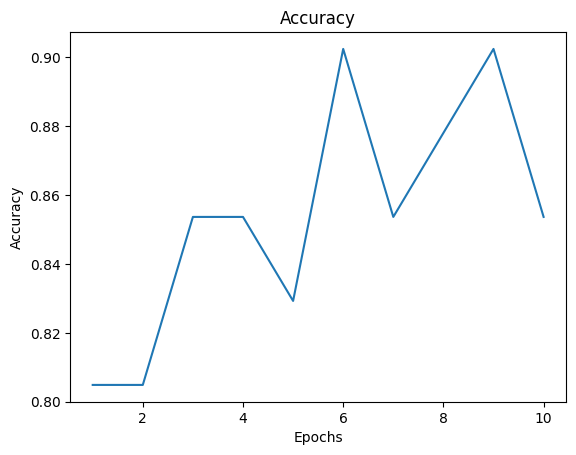

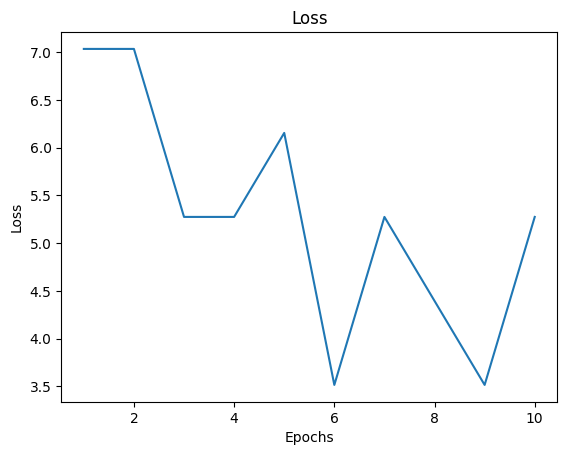

In [212]:
accuracy_values = []
loss_values = []

num_epochs = 10
batch_size = 10

for epoch in range(num_epochs):
    
    classifier.fit(X_train, Y_train)
    
    
    
    X_train_prediction = classifier.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    training_data_loss = log_loss(Y_train, X_train_prediction)

    X_test_prediction = classifier.predict(X_test)
    testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    testing_data_loss = log_loss(Y_test, X_test_prediction)

    
    accuracy_values.append(testing_data_accuracy)
    loss_values.append(testing_data_loss)

    
    print(f"Epoch {epoch+1}: Accuracy = {testing_data_accuracy}, Loss = {testing_data_loss}")

# Plot Accuracy
plt.plot(range(1, num_epochs+1), accuracy_values)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot Loss
plt.plot(range(1, num_epochs+1), loss_values)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [27]:
# Testing data evaluation
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
testing_data_precision = precision_score(X_test_prediction, Y_test)
testing_data_recall = recall_score(X_test_prediction, Y_test)
testing_data_f1_score = f1_score(X_test_prediction, Y_test)

print("Testing Data Accuracy:", testing_data_accuracy)
print("Testing Data Precision:", testing_data_precision)
print("Testing Data Recall:", testing_data_recall)
print("Testing Data F1 Score:", testing_data_f1_score)

Testing Data Accuracy: 0.8536585365853658
Testing Data Precision: 0.8260869565217391
Testing Data Recall: 0.9047619047619048
Testing Data F1 Score: 0.8636363636363636
